# 🧠 Proyecto de Detección de Fraude en Transacciones
Este proyecto tiene como objetivo construir un modelo de Machine Learning para detectar transacciones fraudulentas.

## 1. 🔍 Definición del Problema
Queremos construir un modelo de Machine Learning capaz de detectar si una transacción es fraudulenta o no, basándose en características como el monto, tipo de transacción, comerciante y ubicación. Es un problema de clasificación binaria.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



In [2]:
df = pd.read_csv("./data/credit_card_fraud_dataset.csv")
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


## 2. 📊 Análisis Exploratorio de Datos (AED)

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


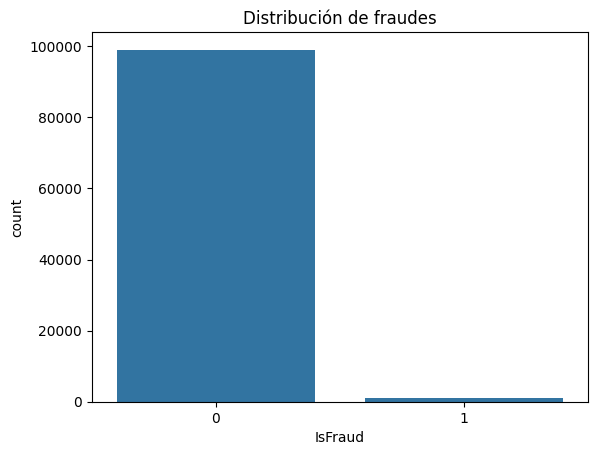

In [4]:
# Distribución de la variable objetivo
sns.countplot(x='IsFraud', data=df)
plt.title('Distribución de fraudes')
plt.show()

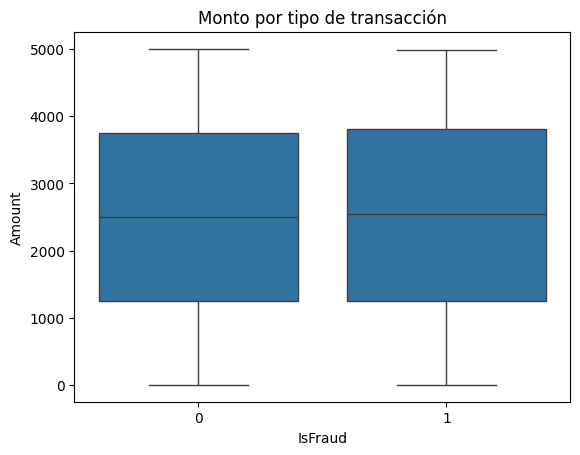

In [5]:
# Comparación del monto entre fraudes y no fraudes
sns.boxplot(x='IsFraud', y='Amount', data=df)
plt.title('Monto por tipo de transacción')
plt.show()

## 3. 🛠 Preprocesamiento de los Datos

In [6]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek

# Selección de variables y target
X = df[['Amount', 'MerchantID', 'TransactionType', 'Location', 'Hour', 'DayOfWeek']]
y = df['IsFraud']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 4. ⚙️ Construcción del Pipeline y Entrenamiento

In [8]:
numeric_features = ['Amount', 'Hour', 'DayOfWeek']
categorical_features = ['MerchantID', 'TransactionType', 'Location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Amount', 'Hour',
                                                   'DayOfWeek']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MerchantID',
                                                   'TransactionType',
                                                   'Location'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## 5. 📈 Evaluación del Modelo

In [9]:
y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19800     0]
 [  200     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



c:\Users\Angelica\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Angelica\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Angelica\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

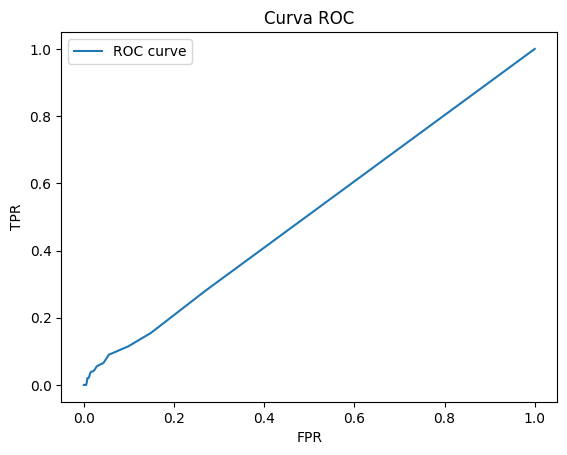

In [10]:
y_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()